## Analyze Results:

I will use the full train results with using dence layers. 

* Load csv file. 
* Categorize the results by MAPE
* Check the correlation between MAPE and other features.


### Import libraies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helper_functions import subplot_by_category

In [2]:
df = pd.read_csv("dense_results_full_data.csv")
df.describe()

,Country,MAPE,Density,Active
count,3135.000000,3135.000000,3135.000000,3.135000e+03
mean,30376.037640,27.996707,4.006963,6.797221e+03
std,15145.862593,1269.835687,6.160199,3.453032e+04
min,1001.000000,0.175896,0.000000,0.000000e+00
25%,18178.000000,1.800255,1.704740,1.495000e+02
50%,29173.000000,3.101383,2.687274,5.130000e+02
75%,45076.000000,5.295601,4.663819,2.209500e+03
max,56045.000000,71091.580000,227.756650,1.153292e+06


In [3]:
df.corr()

,Country,MAPE,Density,Active
Country,1.000000,-0.002846,-0.002241,-0.060420
MAPE,-0.002846,1.000000,-0.011386,-0.003785
Density,-0.002241,-0.011386,1.000000,0.278538
Active,-0.060420,-0.003785,0.278538,1.000000


Same as sample data, there are no correlation between MAPE to other variables. 

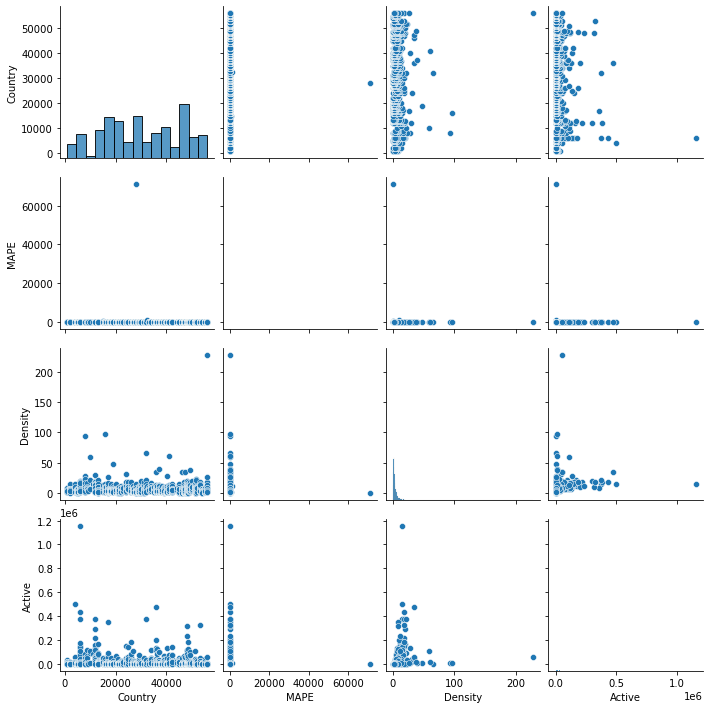

In [7]:
sns.pairplot(df)

In [4]:
df['category'] = pd.cut(df['MAPE'], bins=[0, 1.81, 5.3, max(df['MAPE'])], labels=[1, 2, 3])

In [5]:
df.groupby('category').agg({'MAPE': ['count', 'mean', 'min', 'max'],
                           "Density": ['min', 'max', 'std'],
                           'Active': ['min', 'max', 'std']})

MAPE                                       Density              \
         count        mean       min           max       min         max   
category                                                                   
1          789    1.176878  0.175896      1.809293  0.250684   37.714901   
2         1562    3.231808  1.810108      5.290012  0.322903   47.399479   
3          784  104.327850  5.301190  71091.580000  0.000000  227.756650   

                    Active                         
                std    min      max           std  
category                                           
1          4.141249      1  1153292  52299.639619  
2          3.605795      6   434257  29218.562192  
3         10.408251      0   376291  17124.013061

Category: 1
Length of DataFrame: 789


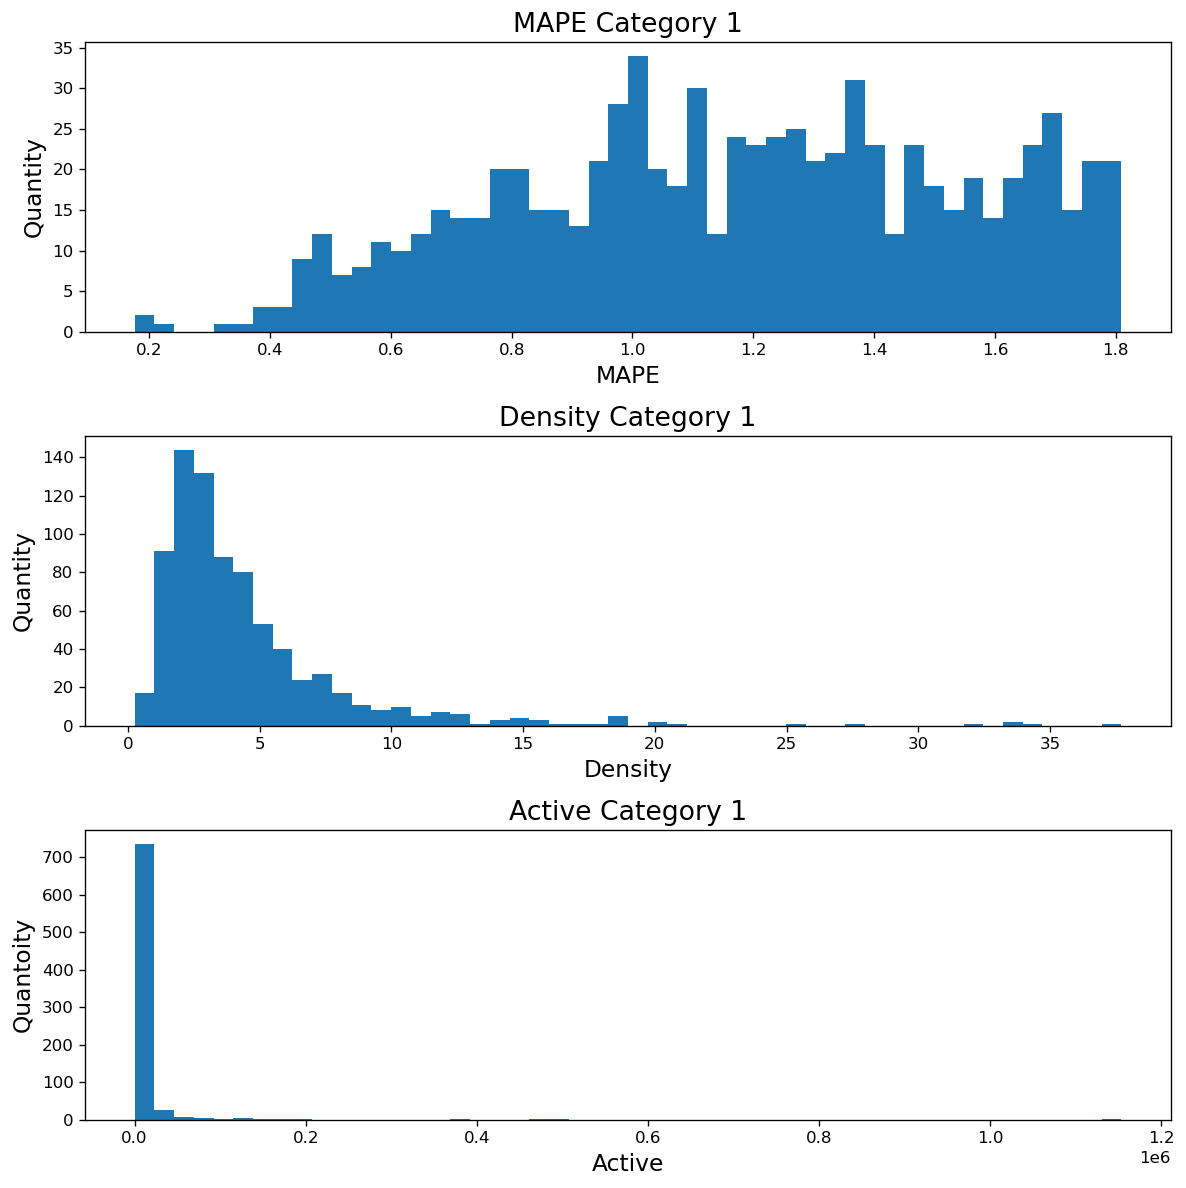

Category: 2
Length of DataFrame: 1562


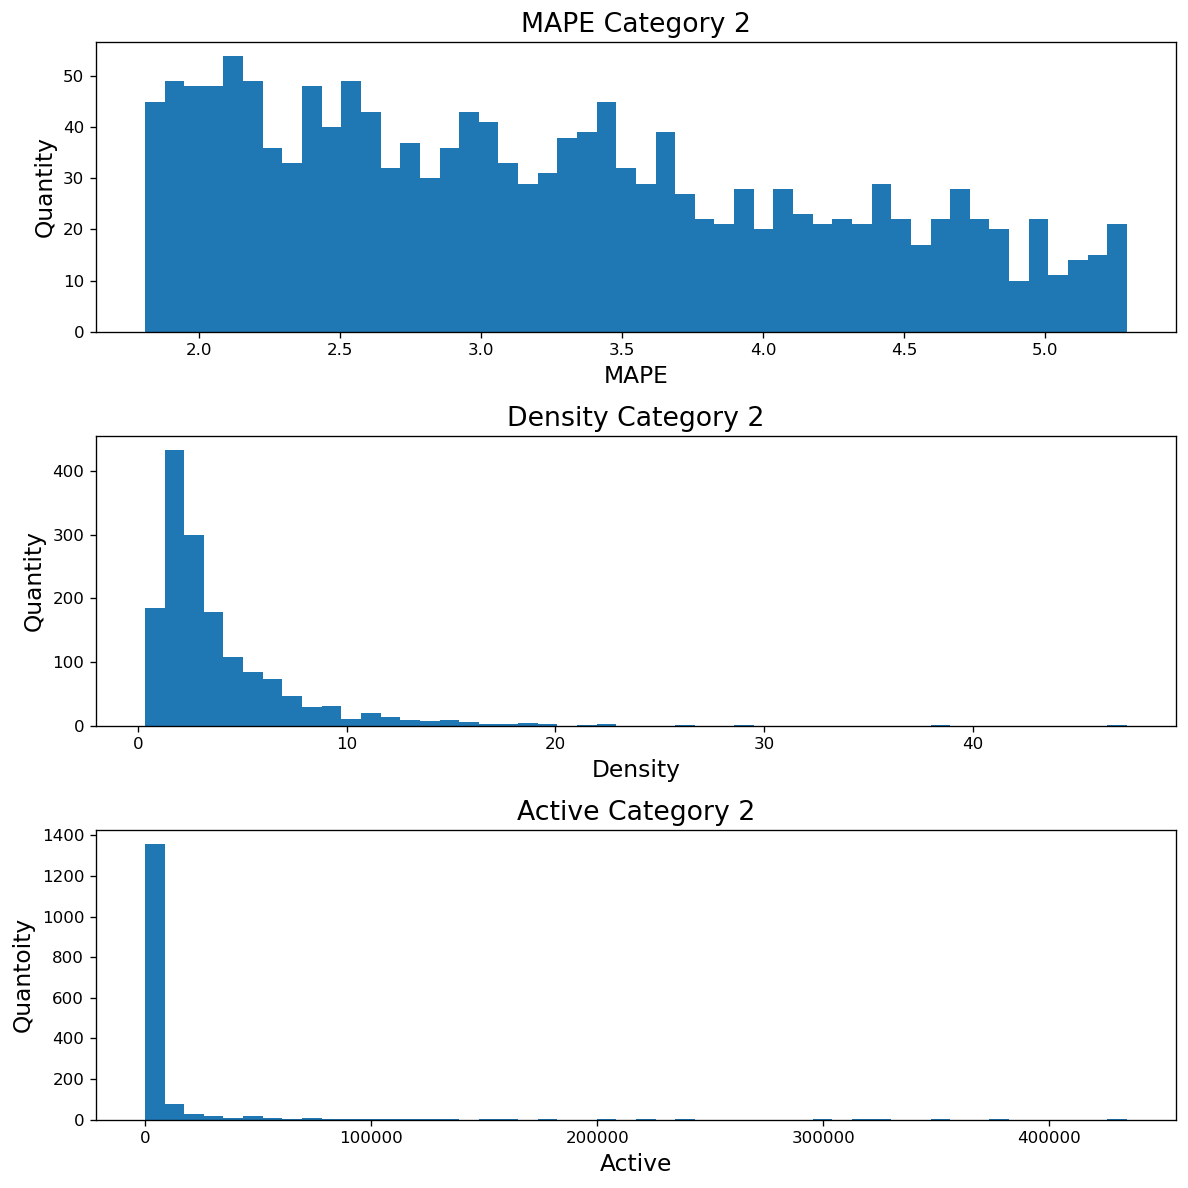

Category: 3
Length of DataFrame: 784


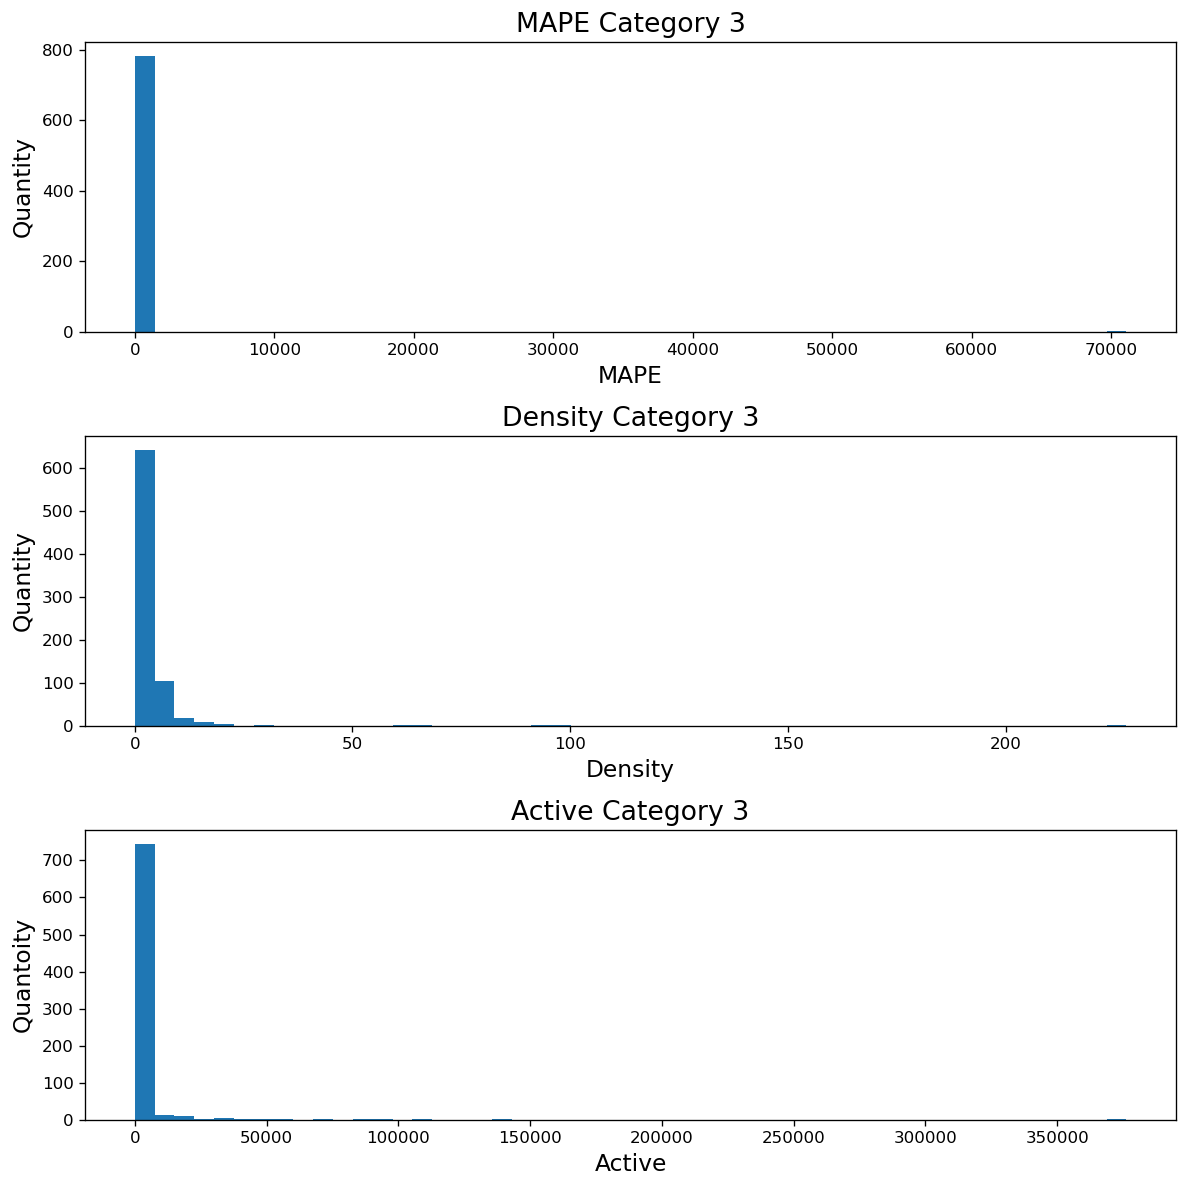

In [6]:
for i in range(1, 4):
    subplot_by_category(df, i)

### Things to do:

* Check category 2 and 3 with same values for prediction. 
    See if the score beat the results. 
* Based on the results, I will tweek the category boundry to maximize the MAPE. 